In [2]:

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


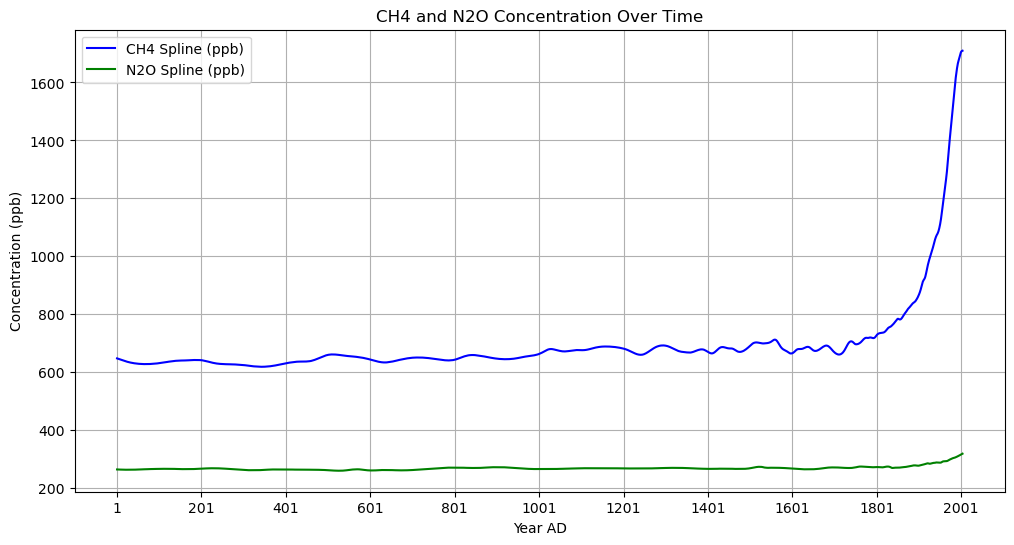

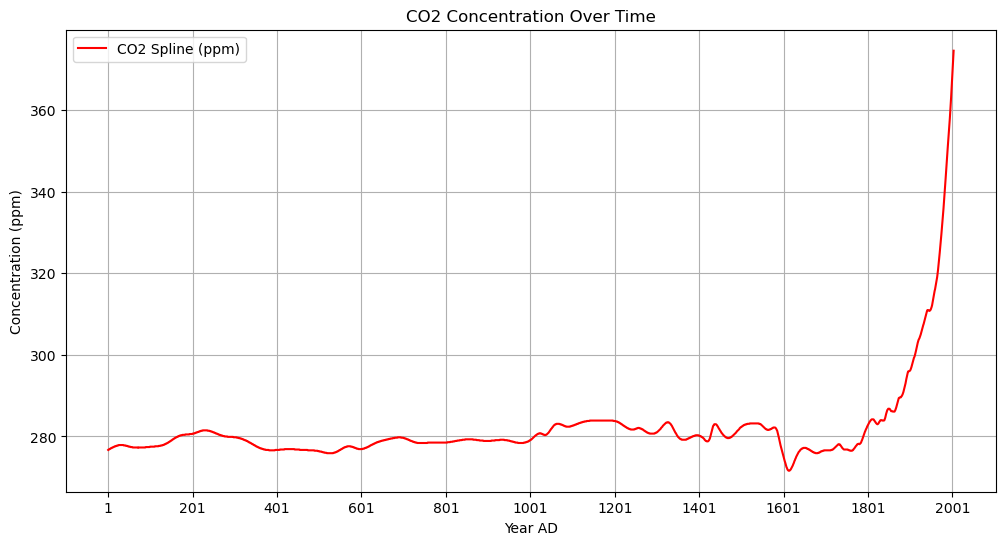

In [3]:
# CO2, CH4, N2O gases historical data from Antarctic ice
# https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=noaa-icecore-9959
# 2000 years of data
# plot the data

antarctic_ice_path = r'../datasets/CO2_climategov/law2006_spline.csv'


antarctic_df = pd.read_csv(antarctic_ice_path)

# Extracting necessary columns
antarctic_data = antarctic_df[['Year AD', 'CH4 Spline (ppb)', 'N2O Spline (ppb)', 'CO2 Spline (ppm)']]
antarctic_data.columns = ['year', 'ch4', 'n2o', 'co2']

# Creating the first plot for CH4 and N2O
plt.figure(figsize=(12, 6))
plt.plot(antarctic_data['year'], antarctic_data['ch4'], label='CH4 Spline (ppb)', color='blue')
plt.plot(antarctic_data['year'], antarctic_data['n2o'], label='N2O Spline (ppb)', color='green')
plt.xlabel('Year AD')
plt.ylabel('Concentration (ppb)')
plt.title('CH4 and N2O Concentration Over Time')
plt.xticks(ticks=range(int(min(antarctic_data['year'])), int(max(antarctic_data['year']))+1, 200))
plt.legend()
plt.grid(True)
plt.show()

# Creating the second plot for CO2
plt.figure(figsize=(12, 6))
plt.plot(antarctic_data['year'], antarctic_data['co2'], label='CO2 Spline (ppm)', color='red')
plt.xlabel('Year AD')
plt.ylabel('Concentration (ppm)')
plt.title('CO2 Concentration Over Time')
plt.xticks(ticks=range(int(min(antarctic_data['year'])), int(max(antarctic_data['year']))+1, 200))
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


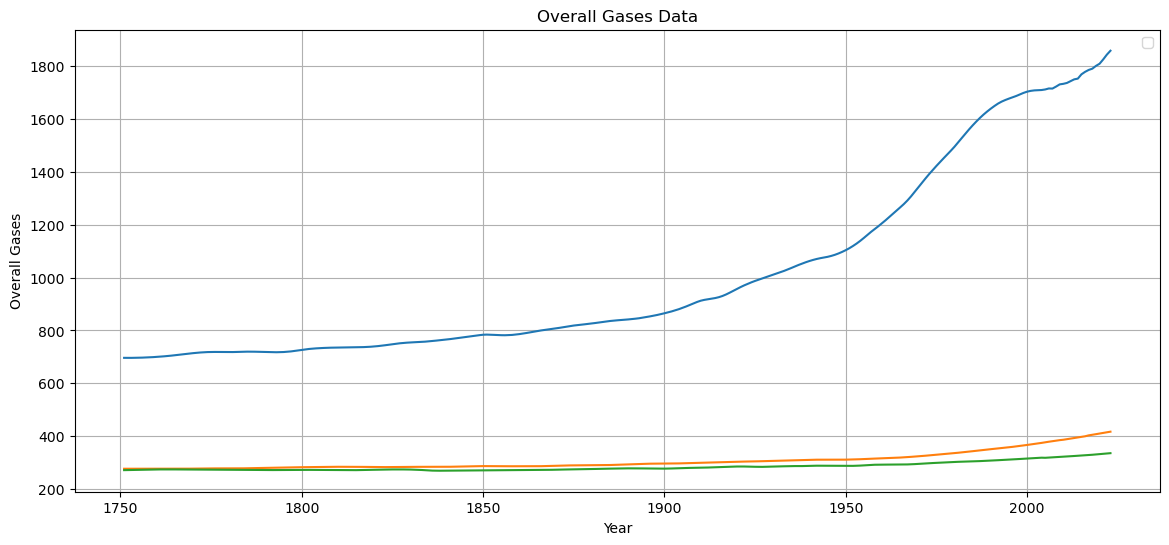

In [4]:

# historical overall gases concentration plot

overall_gases_path = r'../datasets/superdataset.csv'
overall_gases_df = pd.read_csv(overall_gases_path)


# Extracting necessary columns
overall_gases_data = overall_gases_df[['CH4 Spline (ppb)', 'CO2 Spline (ppm)', 'N2O Spline (ppb)']]
overall_gases_year = overall_gases_df['year']


# Plot the overall gases data
plt.figure(figsize=(14, 6))
plt.plot(overall_gases_year, overall_gases_data)
plt.xlabel('Year')
plt.ylabel('Overall Gases')
plt.title('Overall Gases Data')
plt.grid(True)
plt.legend()
plt.show()



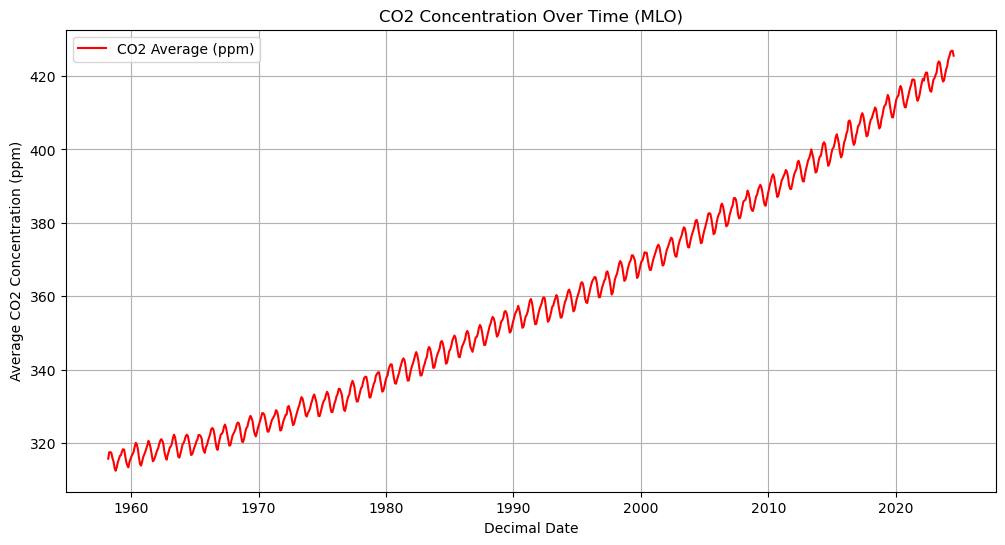

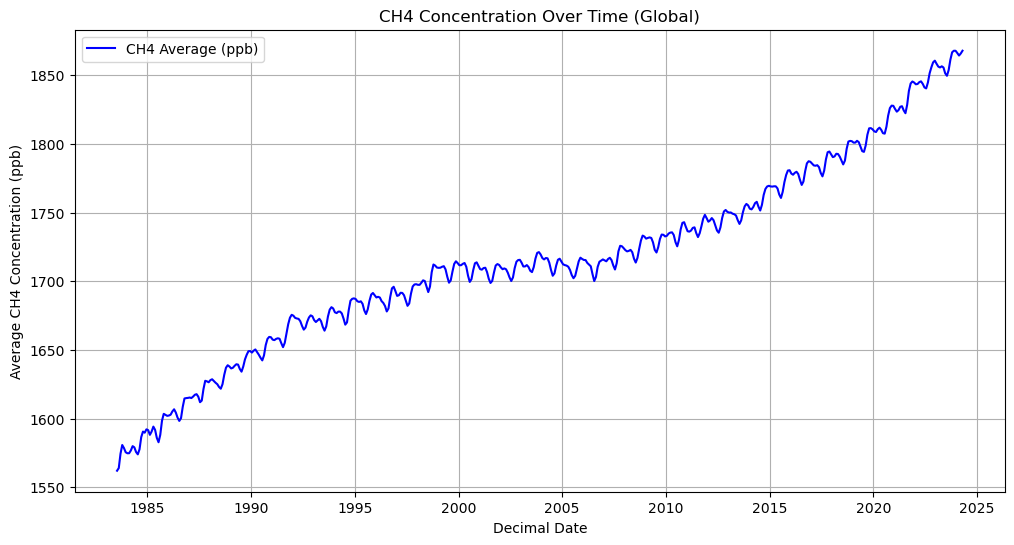

In [5]:
# NOAA GML DATA CO2 CH4 N2O
# https://gml.noaa.gov/ccgg/trends/data.html
# 1958 - now

noaa_co2_path = r'../datasets/CO2_climategov/co2_mm_mlo.csv'
noaa_ch4_path = r'../datasets/CO2_climategov/ch4_mm_gl.csv'


noaa_co2_df = pd.read_csv(noaa_co2_path)
noaa_co2 = noaa_co2_df[['decimal', 'average']]

noaa_ch4_df = pd.read_csv(noaa_ch4_path)
noaa_ch4 = noaa_ch4_df[['decimal', 'average']]



# Creating the plot for CO2
plt.figure(figsize=(12, 6))
plt.plot( noaa_co2['decimal'], noaa_co2['average'] , label='CO2 Average (ppm)', color='red')
plt.xlabel('Decimal Date')
plt.ylabel('Average CO2 Concentration (ppm)')
plt.title('CO2 Concentration Over Time (MLO)')
plt.grid(True)
plt.legend()
plt.show()

# Creating the plot for CH4
plt.figure(figsize=(12, 6))
plt.plot(noaa_ch4['decimal'], noaa_ch4['average'], label='CH4 Average (ppb)', color='blue')
plt.xlabel('Decimal Date')
plt.ylabel('Average CH4 Concentration (ppb)')
plt.title('CH4 Concentration Over Time (Global)')
plt.grid(True)
plt.legend()
plt.show()

     decimal  average
0  1958.2027   315.71
1  1958.2877   317.45
2  1958.3699   317.51
3  1958.4548   317.27
4  1958.5370   315.87
    decimal  average
0  1983.542  1562.09
1  1983.625  1564.01
2  1983.708  1574.42
3  1983.792  1580.81
4  1983.875  1578.59
   decimal    N2O
0   1979.5  300.9
1   1980.5  301.1
2   1981.5  302.0
3   1982.5  303.2
4   1983.5  303.7


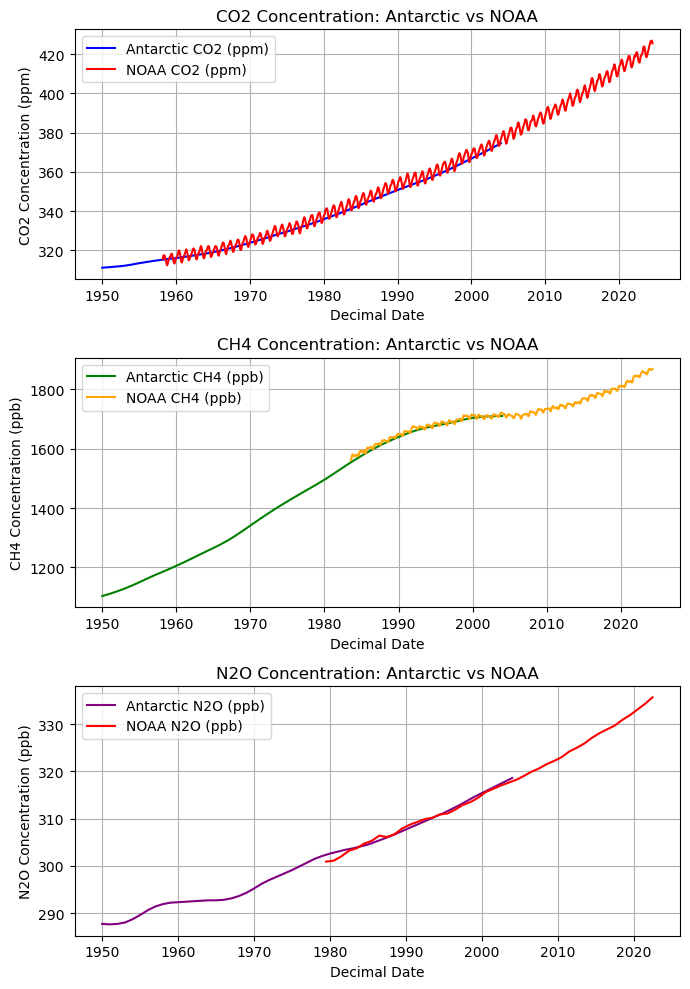

In [6]:

#cut both datasets to the same time period, 1900 - latest year
noaa_co2_path = r'../datasets/CO2_climategov/co2_mm_mlo.csv'
noaa_ch4_path = r'../datasets/CO2_climategov/ch4_mm_gl.csv'

noaa_n2o_path = r'../datasets/CO2_climategov/NOAA_Annual_Mean_MoleFractions_2023.csv'



noaa_co2_df = pd.read_csv(noaa_co2_path)
noaa_co2 = noaa_co2_df[['decimal', 'average']]

noaa_ch4_df = pd.read_csv(noaa_ch4_path)
noaa_ch4 = noaa_ch4_df[['decimal', 'average']]

noaa_n2o_df = pd.read_csv(noaa_n2o_path, skiprows=1)
noaa_n2o = noaa_n2o_df[['year', 'N2O']].rename(columns={'year': 'decimal'})
noaa_n2o['decimal'] = noaa_n2o['decimal'].astype(float)

antarctic_data = antarctic_data[antarctic_data['year'] >= 1950]
noaa_co2 = noaa_co2[noaa_co2['decimal'] >= 1950]
noaa_ch4 = noaa_ch4[noaa_ch4['decimal'] >= 1950]
noaa_n2o = noaa_n2o[noaa_n2o['decimal'] >= 1950]


print(noaa_co2.head())
print(noaa_ch4.head())
print(noaa_n2o.head())
# Create a figure with two subplots: one for CO2 and one for CH4
plt.figure(figsize=(7, 10))

# CO2 Plot
plt.subplot(3, 1, 1)
plt.plot(antarctic_data['year'], antarctic_data['co2'], label='Antarctic CO2 (ppm)', color='blue')
plt.plot(noaa_co2['decimal'], noaa_co2['average'], label='NOAA CO2 (ppm)', color='red')
plt.xlabel('Decimal Date')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('CO2 Concentration: Antarctic vs NOAA')
plt.legend()
plt.grid(True)

# CH4 Plot
plt.subplot(3, 1, 2)
plt.plot(antarctic_data['year'], antarctic_data['ch4'], label='Antarctic CH4 (ppb)', color='green')
plt.plot(noaa_ch4['decimal'], noaa_ch4['average'], label='NOAA CH4 (ppb)', color='orange')
plt.xlabel('Decimal Date')
plt.ylabel('CH4 Concentration (ppb)')
plt.title('CH4 Concentration: Antarctic vs NOAA')
plt.legend()
plt.grid(True)

# n2o plot
plt.subplot(3, 1, 3)
plt.plot(antarctic_data['year'], antarctic_data['n2o'], label='Antarctic N2O (ppb)', color='purple')
plt.plot(noaa_n2o['decimal'], noaa_n2o['N2O'], label='NOAA N2O (ppb)', color='red')
plt.xlabel('Decimal Date')
plt.ylabel('N2O Concentration (ppb)')
plt.title('N2O Concentration: Antarctic vs NOAA')
plt.legend()
plt.grid(True)

# Show the combined plots
plt.tight_layout()
plt.show()

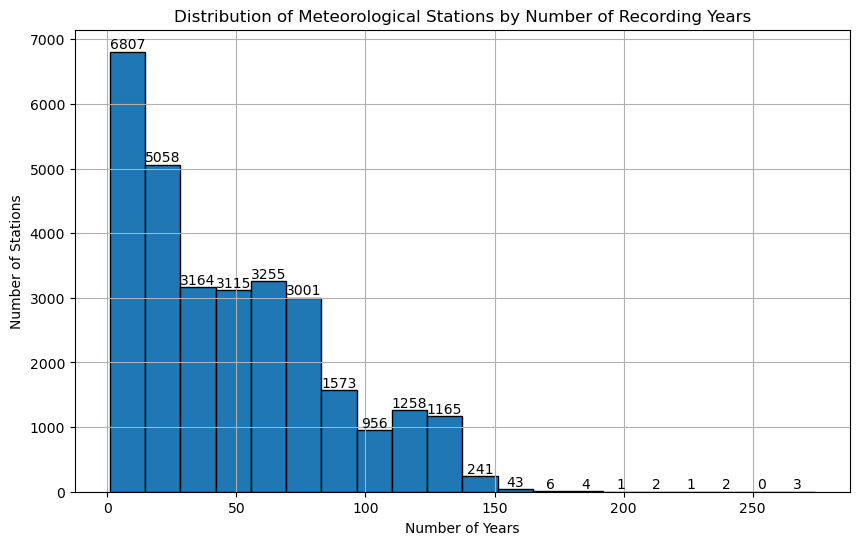

In [7]:
### temperature part

# station_summary data, show about the station statistics

station_summary_path = r'../datasets/ghcnd/station_summary.csv'
station_summary_data = pd.read_csv(station_summary_path)

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(station_summary_data['num_years'], bins=20, edgecolor='black')

# text labels
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, int(count), 
             ha='center', va='bottom')

plt.title('Distribution of Meteorological Stations by Number of Recording Years')
plt.xlabel('Number of Years')
plt.ylabel('Number of Stations')
plt.grid(True)

plt.show()




C:\Users\16671\AppData\Local\Temp\ipykernel_16568\697229639.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa_co2['average_relative'] = noaa_co2['average'] / co2_base
C:\Users\16671\AppData\Local\Temp\ipykernel_16568\697229639.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa_ch4['average_relative'] = noaa_ch4['average'] / ch4_base


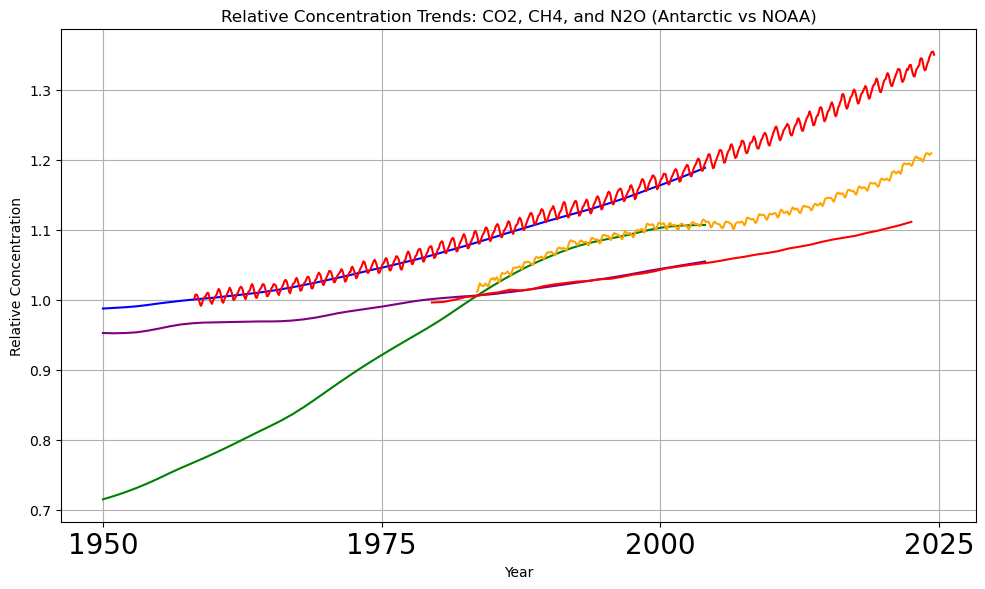

In [8]:


noaa_co2_path = r'../datasets/CO2_climategov/co2_mm_mlo.csv'
noaa_ch4_path = r'../datasets/CO2_climategov/ch4_mm_gl.csv'
noaa_n2o_path = r'../datasets/CO2_climategov/NOAA_Annual_Mean_MoleFractions_2023.csv'
antarctic_ice_path = r'../datasets/CO2_climategov/law2006_spline.csv'

noaa_co2_df = pd.read_csv(noaa_co2_path)
noaa_ch4_df = pd.read_csv(noaa_ch4_path)
noaa_n2o_df = pd.read_csv(noaa_n2o_path, skiprows=1)
antarctic_df = pd.read_csv(antarctic_ice_path)

# necessary columns
antarctic_data = antarctic_df[['Year AD', 'CH4 Spline (ppb)', 'N2O Spline (ppb)', 'CO2 Spline (ppm)']]
antarctic_data.columns = ['year', 'ch4', 'n2o', 'co2']

# starting from 1950 onwards
antarctic_data = antarctic_data[antarctic_data['year'] >= 1950]

noaa_co2 = noaa_co2_df[['decimal', 'average']]
noaa_ch4 = noaa_ch4_df[['decimal', 'average']]
noaa_n2o = noaa_n2o_df[['year', 'N2O']].rename(columns={'year': 'decimal'})
noaa_n2o['decimal'] = noaa_n2o['decimal'].astype(float)

# start years for NOAA data
co2_start_year = 1958.2027
ch4_start_year = 1983.542
n2o_start_year = 1979.5


def get_starting_value(antarctic_data, start_year, gas_name):
    antarctic_start_value = antarctic_data.loc[antarctic_data['year'] == int(start_year), gas_name].values[0]
    return antarctic_start_value

# normalize noaa
co2_base = get_starting_value(antarctic_data, co2_start_year, 'co2')
noaa_co2['average_relative'] = noaa_co2['average'] / co2_base

ch4_base = get_starting_value(antarctic_data, ch4_start_year, 'ch4')
noaa_ch4['average_relative'] = noaa_ch4['average'] / ch4_base

n2o_base = get_starting_value(antarctic_data, n2o_start_year, 'n2o')
noaa_n2o['N2O_relative'] = noaa_n2o['N2O'] / n2o_base

# normalize antarctic 
antarctic_data['co2_relative'] = antarctic_data['co2'] / get_starting_value(antarctic_data, co2_start_year, 'co2')
antarctic_data['ch4_relative'] = antarctic_data['ch4'] / get_starting_value(antarctic_data, ch4_start_year, 'ch4')
antarctic_data['n2o_relative'] = antarctic_data['n2o'] / get_starting_value(antarctic_data, n2o_start_year, 'n2o')

plt.figure(figsize=(10, 6))

# CO2 Plot
plt.plot(antarctic_data['year'], antarctic_data['co2_relative'], label='Antarctic CO2 (relative)', color='blue')
plt.plot(noaa_co2['decimal'], noaa_co2['average_relative'], label='NOAA CO2 (relative)', color='red')

# CH4 Plot
plt.plot(antarctic_data['year'], antarctic_data['ch4_relative'], label='Antarctic CH4 (relative)', color='green')
plt.plot(noaa_ch4['decimal'], noaa_ch4['average_relative'], label='NOAA CH4 (relative)', color='orange')

# N2O Plot
plt.plot(antarctic_data['year'], antarctic_data['n2o_relative'], label='Antarctic N2O (relative)', color='purple')
plt.plot(noaa_n2o['decimal'], noaa_n2o['N2O_relative'], label='NOAA N2O (relative)', color='red')

plt.xlabel('Year')
plt.ylabel('Relative Concentration')
plt.title('Relative Concentration Trends: CO2, CH4, and N2O (Antarctic vs NOAA)')
plt.xticks([1950,1975,2000, 2025],fontsize=20)
plt.grid(True)

plt.tight_layout()
plt.show()


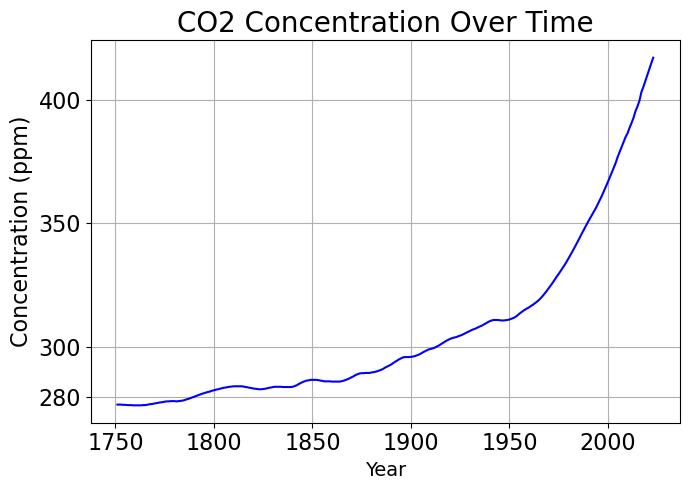

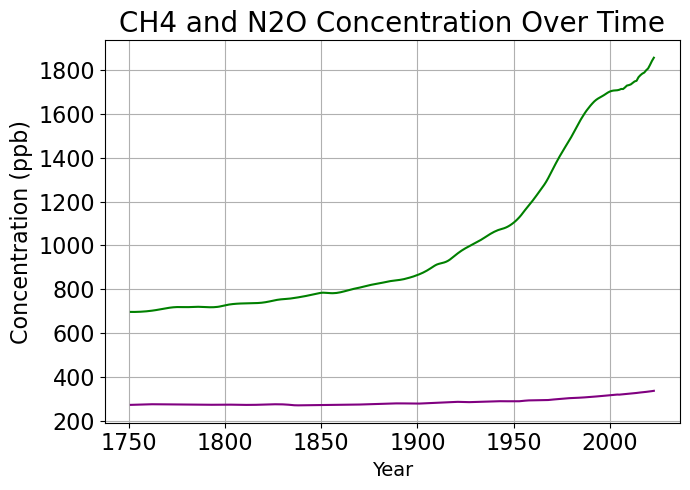

In [9]:

superdataset_path = r'../datasets/superdataset.csv'

superdataset_df = pd.read_csv(superdataset_path)

# Extract
years = superdataset_df['year']
co2 = superdataset_df['CO2 Spline (ppm)']
ch4 = superdataset_df['CH4 Spline (ppb)']
n2o = superdataset_df['N2O Spline (ppb)']

# CO2
plt.figure(figsize=(7, 5))
plt.plot(years, co2, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Concentration (ppm)', fontsize=16)
plt.title('CO2 Concentration Over Time', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks([280, 300, 350, 400], fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting CH4 and N2O together
plt.figure(figsize=(7, 5))
plt.plot(years, ch4, color='green')
plt.plot(years, n2o, color='purple')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Concentration (ppb)', fontsize=16)
plt.title('CH4 and N2O Concentration Over Time', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen


superdataset_path = r'../datasets/superdataset.csv'
superdataset = pd.read_csv(superdataset_path)

data = superdataset[superdataset['year'] >= 1850]
print(data.head())
# columns
columns_to_test = ['TSI', 'CH4 Spline (ppb)', 'CO2 Spline (ppm)', 'N2O Spline (ppb)', 'aerosol', 'avg_temp']
data_for_coint = data[columns_to_test]
johansen_test = coint_johansen(data_for_coint, det_order=0, k_ar_diff=1)

def get_johansen_results(test_result):
    results = []
    trace_stat = test_result.lr1
    crit_values = test_result.cvt
    
    results.append('Johansen Test Results:')
    for i, (trace, cv) in enumerate(zip(trace_stat, crit_values)):
        results.append(f'Null Hypothesis: Rank <= {i}')
        results.append(f'Trace Statistic: {trace:.4f}')
        results.append(f'Critical Values (90%): {cv[0]:.4f}, (95%): {cv[1]:.4f}, (99%): {cv[2]:.4f}')
        results.append('--------------------------------------')
    return "\n".join(results)

johansen_results_text = get_johansen_results(johansen_test)

output_file_path = '../datasets/johansen_test_results.txt'
with open(output_file_path, 'w') as file:
    file.write(johansen_results_text)

     year        TSI  CH4 Spline (ppb)  CO2 Spline (ppm)  N2O Spline (ppb)  \
99   1850  1361.7005             783.8             286.8             270.4   
100  1851  1361.5037             784.3             286.8             270.4   
101  1852  1361.4177             784.0             286.8             270.4   
102  1853  1361.2921             783.3             286.7             270.4   
103  1854  1361.0975             782.6             286.5             270.5   

      aerosol  avg_temp         up        low  error_up  error_low      t_up  \
99   0.003600  9.566273   9.243242  -9.091758  0.424267  -0.424267  2.310810   
100  0.002508  9.450329   9.723954  -9.076046  0.417799  -0.417799  2.430988   
101  0.001442  9.999350  10.447069 -11.052931  0.470339  -0.470339  2.611767   
102  0.000617  9.559757   9.583635  -9.316365  0.441558  -0.441558  2.395909   
103  0.000283  9.260286  10.342314 -12.007686  0.448668  -0.448668  2.585579   

        t_low  
99  -2.272940  
100 -2.269012  
10

In [35]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np

data = superdataset[superdataset['year'] >= 1763]

columns_to_analyze = ['TSI', 'CH4 Spline (ppb)', 'CO2 Spline (ppm)', 'N2O Spline (ppb)', 'aerosol', 'avg_temp']
data_for_analysis = data[columns_to_analyze]

with open('../datasets/ADF_test.txt', 'w') as file:

    # Function to perform ADF test and save the results to the file
    def adf_test(series, series_name):
        result = adfuller(series, autolag='AIC')
        file.write(f'ADF Test for {series_name}\n')
        file.write(f'ADF Statistic: {result[0]:.4f}\n')
        file.write(f'p-value: {result[1]:.4f}\n')
        file.write(f'Critical Values: {result[4]}\n')
        if result[1] > 0.05:
            file.write(f"Fail to reject the null hypothesis (non-stationary) for {series_name}\n\n")
        else:
            file.write(f"Reject the null hypothesis (stationary) for {series_name}\n\n")

    # Perform ADF test on each column
    for column in columns_to_analyze:
        adf_test(data_for_analysis[column], column)

    data_diff = data_for_analysis.diff().dropna()

    # Perform ADF test on differenced data
    file.write("\nADF Test on Differenced Data:\n\n")
    for column in columns_to_analyze:
        adf_test(data_diff[column], column)

    # Function to select the best lag order using AIC
    def select_best_lag(data_diff):
        model = VAR(data_diff)
        lag_order_results = model.select_order(maxlags=15)  
        file.write("Lag Order Selection based on AIC, BIC, FPE, HQIC:\n")
        file.write(lag_order_results.summary().as_text())
        return lag_order_results.aic

    best_lag = select_best_lag(data_diff)
    file.write(f"\nThe best lag order based on AIC is: {best_lag}\n")

data_diff = data_for_analysis.diff().dropna()

# Fit the VECM model with the selected lag order (k_ar_diff)
vecm = VECM(data_diff, k_ar_diff=50, deterministic='ci').fit()

with open('../datasets/VECM_results.txt', 'w') as file:
    file.write("VECM Model Summary\n")
    file.write("===================\n")
    file.write(vecm.summary().as_text())

    file.write("\n\nVECM Alpha (Adjustment Coefficients)\n")
    file.write("===================\n")
    file.write(str(vecm.alpha))

    file.write("\n\nVECM Beta (Cointegration Relations)\n")
    file.write("===================\n")
    file.write(str(vecm.beta))

    file.write("\n\nVECM Gamma (Short-Term Dynamics)\n")
    file.write("===================\n")
    for i, gamma in enumerate(vecm.gamma):
        file.write(f"\nGamma_{i}:\n")
        file.write(str(gamma))

    file.write("\n\nVECM Error Correction Terms (ECT)\n")
    file.write("===================\n")

    ect = np.dot(vecm.alpha, vecm.beta.T)
    file.write(str(ect))






c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:1546: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params_default))


In [22]:
from statsmodels.tsa.stattools import grangercausalitytests

data = superdataset[superdataset['year'] >= 1763]

columns_to_analyze = ['TSI', 'CH4 Spline (ppb)', 'CO2 Spline (ppm)', 'N2O Spline (ppb)', 'aerosol', 'avg_temp']
data_for_analysis = data[columns_to_analyze].diff().dropna()  # differenced data

granger_results = {}

for col in columns_to_analyze[:-1]:
    test_result = grangercausalitytests(data_for_analysis[[col, 'avg_temp']], maxlag=15, verbose=False)
    # Store the p-values for each lag
    p_values = [round(test_result[lag][0]['ssr_chi2test'][1], 4) for lag in range(1, 16)]
    granger_results[col] = p_values

granger_df = pd.DataFrame(granger_results, index=[f'Lag {i}' for i in range(1, 16)])


granger_df.to_csv('granger_causality_results.csv')



c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


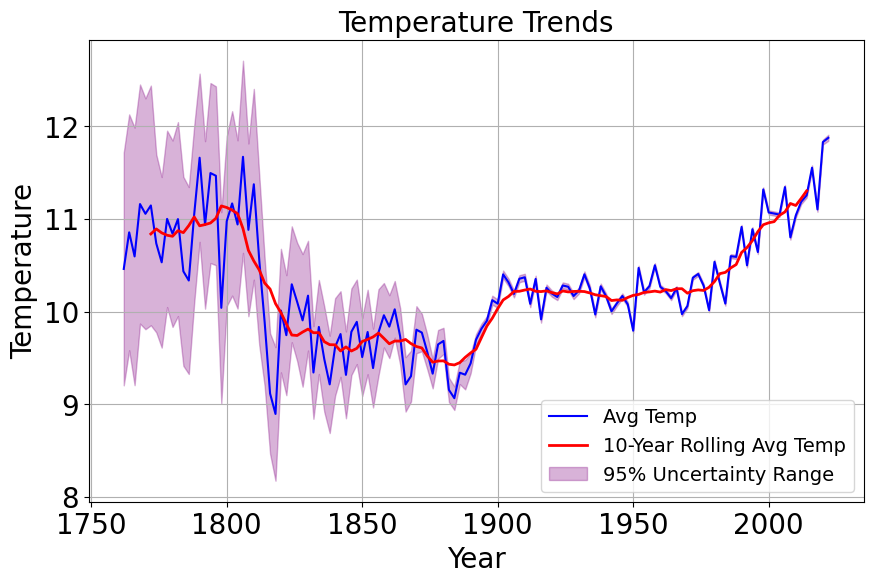

In [21]:

superdataset_path = r'../datasets/superdataset.csv'
superdataset_df = pd.read_csv(superdataset_path)



superdataset_df['year'] = superdataset_df['year'].astype(int)


superdataset_df = superdataset_df.set_index('year')
superdataset_df = superdataset_df.groupby((superdataset_df.index // 2) * 2).mean().reset_index()

years = superdataset_df['year']
avg_temp = superdataset_df['avg_temp']

error_up = superdataset_df['error_up']
error_low = superdataset_df['error_low']

error_upper_bound = avg_temp + error_up 
error_lower_bound = avg_temp + error_low 

#  10-year rolling average
rolling_avg_temp = avg_temp.rolling(window=10, center=True).mean()


plt.figure(figsize=(10, 6))

plt.plot(years, avg_temp, color='blue', label='Avg Temp')
plt.plot(years, rolling_avg_temp, color='red', linestyle='-', linewidth=2, label='10-Year Rolling Avg Temp')


#plt.fill_between(years, lower_bound, upper_bound, color='gray', alpha=0.5, label='Up/Low Range')

plt.fill_between(years, error_lower_bound, error_upper_bound, color='purple', alpha=0.3, label='95% Uncertainty Range')



plt.title('Temperature Trends', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='lower right', fontsize=14)
plt.show()

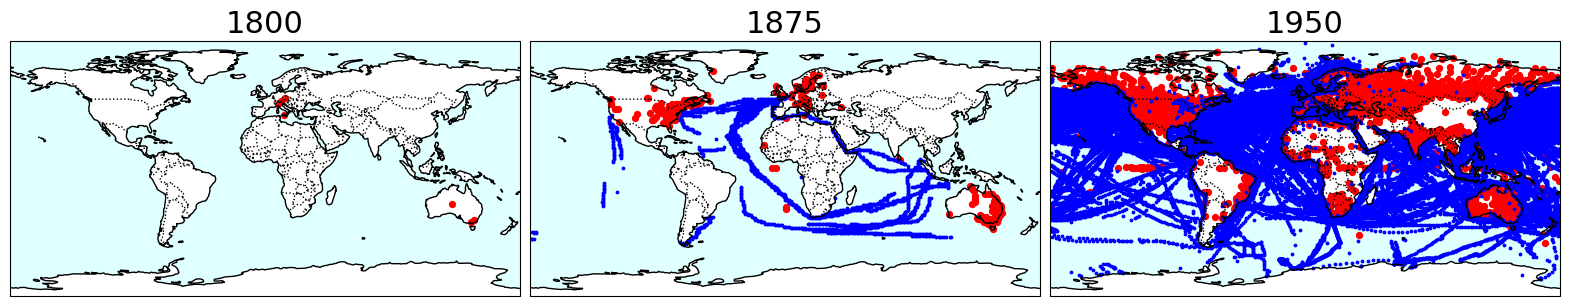

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# station map on earth, 1800, 1875, 1950
# land 
land_data = pd.read_csv(r'../datasets/ghcnd/station_list.csv')

land_data['start_year'] = land_data['date'].apply(lambda x: int(x.split('-')[0]))
land_data['end_year'] = land_data['date'].apply(lambda x: int(x.split('-')[1]))

land_data['longitude'] = pd.to_numeric(land_data['longitude'], errors='coerce')
land_data['latitude'] = pd.to_numeric(land_data['latitude'], errors='coerce')
land_data = land_data.dropna(subset=['longitude', 'latitude'])

# and ocean data
ocean_data_1900 = pd.read_csv(r'C:\mod\University\ucd1s\Project\project-ouyang\datasets\ceda_miads\cleaned\1875_1.csv')
ocean_data_2000 = pd.read_csv(r'C:\mod\University\ucd1s\Project\project-ouyang\datasets\ceda_miads\cleaned\2000_1.csv')

# only unique values
ocean_data_1900_unique = ocean_data_1900[['LATITUDE', 'LONGITUDE']].drop_duplicates()
ocean_data_2000_unique = ocean_data_2000[['LATITUDE', 'LONGITUDE']].drop_duplicates()

years_to_plot = [1800, 1875, 1950]

projection = ccrs.PlateCarree()
fig, axes = plt.subplots(1, len(years_to_plot), figsize=(20, 15), subplot_kw={'projection': projection})
plt.subplots_adjust(wspace=0.02)

for i, year in enumerate(years_to_plot):
    ax = axes[i]
    
    ax.set_global()
    active_land_stations = land_data[(land_data['start_year'] <= year) & (land_data['end_year'] >= year)]
    
    ax.add_feature(cfeature.LAND, facecolor='white')
    ax.add_feature(cfeature.OCEAN, facecolor='lightcyan')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # plot
    ax.scatter(active_land_stations['longitude'], active_land_stations['latitude'], 
               color='red', s=18, transform=ccrs.PlateCarree(), label='Land Station')
    
    # Plot the ocean stations for 1875 and 1950
    if year == 1875:
        ax.scatter(ocean_data_1900_unique['LONGITUDE'], ocean_data_1900_unique['LATITUDE'], 
                   color='blue', s=3, transform=ccrs.PlateCarree(), label='Ocean Station (1900)')
    elif year == 1950:
        ax.scatter(ocean_data_2000_unique['LONGITUDE'], ocean_data_2000_unique['LATITUDE'], 
                   color='blue', s=3, transform=ccrs.PlateCarree(), label='Ocean Station (2000)')
    
    ax.set_title(f"{year}", fontsize=22)

plt.show()

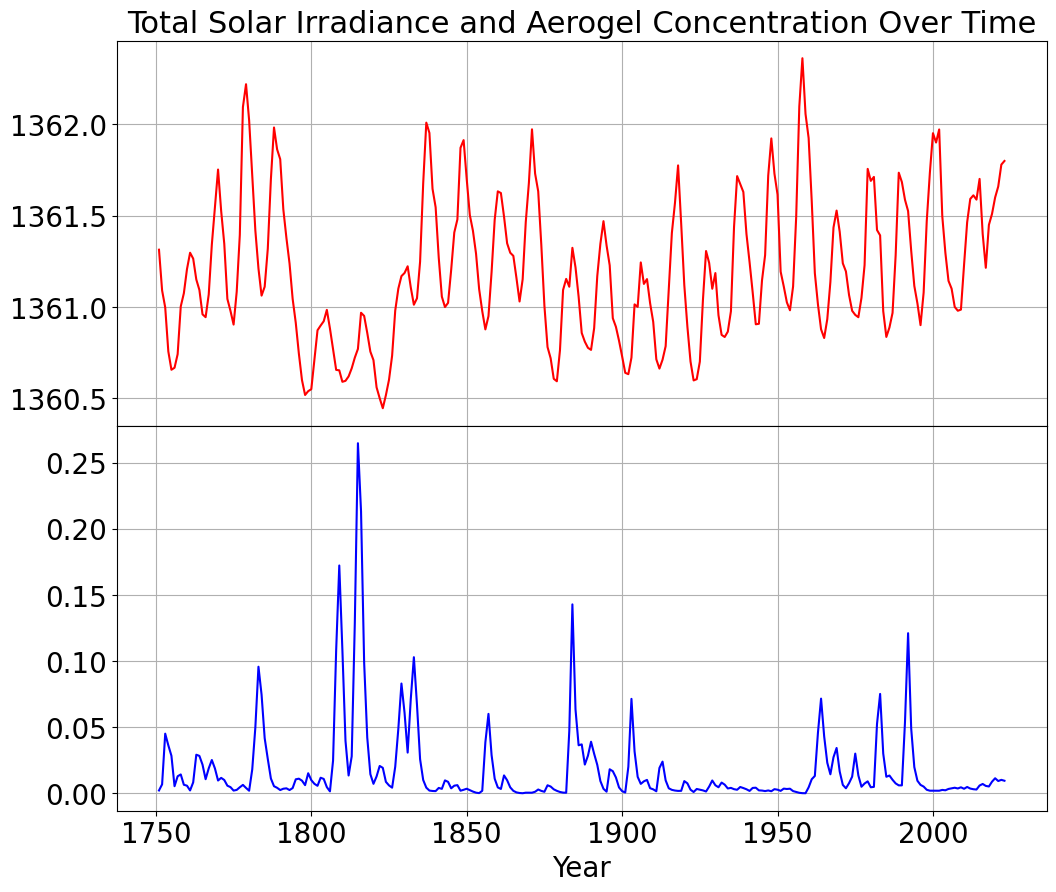

In [23]:
superdataset_path = r'../datasets/superdataset.csv'
superdataset_df = pd.read_csv(superdataset_path)

years = superdataset_df['year']
tsi = superdataset_df['TSI']
aerosol = superdataset_df['aerosol']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax1.plot(years, tsi, color='red')
ax1.set_yticks([1360.5, 1361, 1361.5, 1362])
ax1.tick_params(axis='y', labelsize=20)
ax1.grid(True)
ax1.set_title('Total Solar Irradiance and Aerogel Concentration Over Time', fontsize=22)

ax2.plot(years, aerosol, color='blue')
ax2.set_xlabel('Year', fontsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.grid(True)

ax1.set_ylabel('')
ax2.set_ylabel('')

plt.subplots_adjust(hspace=0)  

plt.show()

In [ ]:
# count the number of station

# for 1800

# for 1875

# for 1950

# I manually counted the number of stations in the station_list.csv file